# Temas Tratados en el Trabajo Práctico 8

* Aprendizaje estadístico.

* Evolución de la verosimilitud de una hipótesis en función de observaciones.

* Aprendizaje no supervisado. Algoritmo K-means.

* Aprendizaje supervisado. Algoritmo Knn.

* Aprendizaje por refuerzo. Algoritmo Q-Learning.

# Ejercicios Teóricos

## 1. Un fabricante de tornillos vende cajas que contienen 1000 tornillos de cabeza redonda con tres tipos de recubrimiento electrolítico (cincado, cobre y níquel). Cada caja se rellena con diferentes proporciones que pueden variar de la siguiente manera:

&emsp;&emsp;a: Todos los tornillos están recubiertos de níquel. 15 de cada 100 cajas se llenan de esta manera.

&emsp;&emsp;b: El 70% de los tornillos están recubiertos de níquel, el 20% de cobre, el resto está cincado. 15 de cada 100 cajas se llenan de esta manera.

&emsp;&emsp;c: El 50% de los tornillos están recubiertos de níquel, el 25% de cobre y el resto está cincado. 50 de cada 100 cajas se llenan de esta manera.

&emsp;&emsp;d: El 20 % de los tornillos están recubiertos de níquel, el 50% de cobre y el resto está cincado. 10 de cada 100 cajas se llenan de esta manera.

&emsp;&emsp;e: Todos los tornillos están recubiertos de cobre. 10 de cada 100 cajas se llenan de esta manera.


### 1.1 ¿Cuál es la distribución a priori sobre las hipótesis?

La distribución a priori sobre las hipótesis son las frecuencias de tipos de caja, es decir, el dominio de la hipótesis son los tipos de caja: $\Omega_H = \{ A, B, C, D, E \}$. 

Luego, podemos plantear la siguiente tabla, teniendo en cuenta que la __frecuencia__ es por __cada 100 cajas__:

| Tipo de Caja | Frecuencia | Probabilidad a priori |
| ------------ | ---------- | --------------------- |
| A            | 15         | 15%                   |
| B            | 15         | 15%                   |
| C            | 50         | 50%                   |
| D            | 10         | 10%                   |
| E            | 10         | 10%                   |

Esto lo interpretamos como:
- $P(H=A) = 15\%$
- $P(H=B) = 15\%$
- $P(H=C) = 50\%$
- $P(H=D) = 10\%$
- $P(H=E) = 10\%$



### 1.2 Considerando que los 10 primeros tornillos que se extraen de una caja de muestra son de cobre: Calcule la probabilidad de cada hipótesis dado que los 10 primeros tornillos fueron de cobre.

Lo que queremos calcular es $P(H|E, E, \dots, E)$ dado que sucedio $E=Cu$ 10 veces consecutivas. 

Para ello, primero debemos calcular la verosimilitud $P(E = 10 \times Cu | H)$. Considerando que al sacar un tornillo de cobre, las probabilidades se modifican (sin reemplazo), planteamos:


$$
\begin{align*}
P(Cu | A)  & = 0  \\
P(10 \times Cu | A)  & = 0
 \\
 \\
P(Cu | B)  & = 0.2  \\
P(10 \times Cu | B) & = \prod_{j=0}^{9} \frac{200-j}{1000-j} = 8,5232 \times 10^{-8} \\
 \\
P(Cu | C)  & = 0.25 \\
P(10 \times Cu | C) & = \prod_{j=0}^{9} \frac{250-j}{1000-j} = 8,31425 \times 10^{-7} \\
 \\
P(Cu | D)  & = 0.5   \\
P(10 \times Cu | D) & = \prod_{j=0}^{9} \frac{500-j}{1000-j} = 9,33188 \times 10^{-4} \\
 \\
P(Cu | E)  & = 1  \\
P(10 \times Cu | E) & = 1 
\end{align*}
$$


Luego, con ley de bayes podemos calcular las probabilidades de que ocurra $H_{i}$ sabiendo que sucedió $E=Cu$ 10 veces consecutivas:
$$
P(H_{i} | 10 \times Cu) = \frac{P(H_{i}) P(10 \times Cu | H_{i})}{\sum_{j} P(H_{j}) P(10 \times Cu | H_{j})} = \frac{P(H_{i}) P(10 \times Cu | H_{i})}{\alpha}
$$

Primero, calculamos $\alpha$ :
$$
\begin{align*}
\alpha  & = P(A) P(10 \times Cu | A) + P(B)P(10 \times Cu | B) +P(C) P(10 \times Cu | C) \\
 & + P(D)P(10 \times Cu | D) + P(E)P(10 \times Cu | E) 
 \\
 \\
\alpha & \approx 0,1000937473\\
\end{align*} 
$$
Y las probabilidades quedan:


| Caja | Probabilidad                 |
| ---- | ---------------------------- |
| A    | $0\%$                        |
| B    | $1,277 \times 10 ^{-5} \;\%$ |
| C    | $4,153 \times 10 ^{-4} \;\%$ |
| D    | $9,323 \times 10 ^{-2} \;\%$ |
| E    | $99,906\;\%$                 |


Usando el sentido común, es obvio que si solo saco tornillos consecutivos con recubrimiento de cobre, la opción más probable es que sea la caja que esta constituidas sola y exclusivamente de tornillos recubiertos de cobre. Curiosamente, toma solo un tornillo con otro recubrimiento para que la probabilidad se vuelva cero (ya que si hay 2 tipos de recubrimiento diferentes que salieron de una misma caja, obviamente no puede ser una caja que contiene exclusivamente tornillos de un único tipo de recubrimiento).

### 1.3 Grafique la evolución de la verosimilitud de cada hipótesis en función del número de tornillos extraídos de la caja.

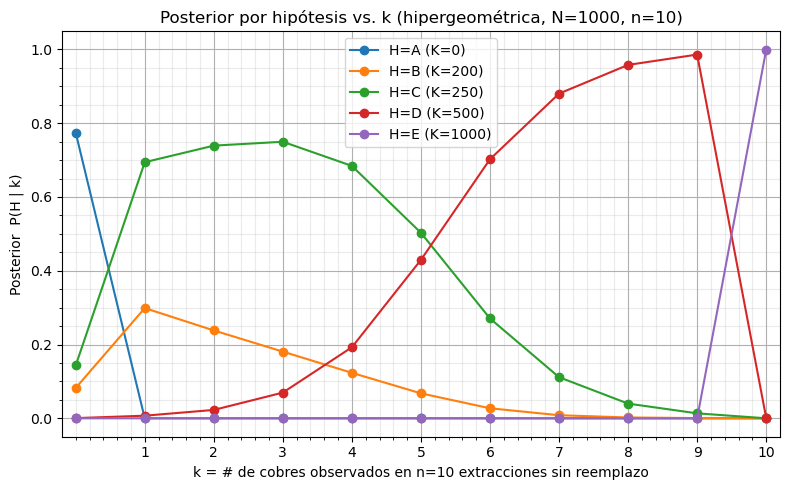

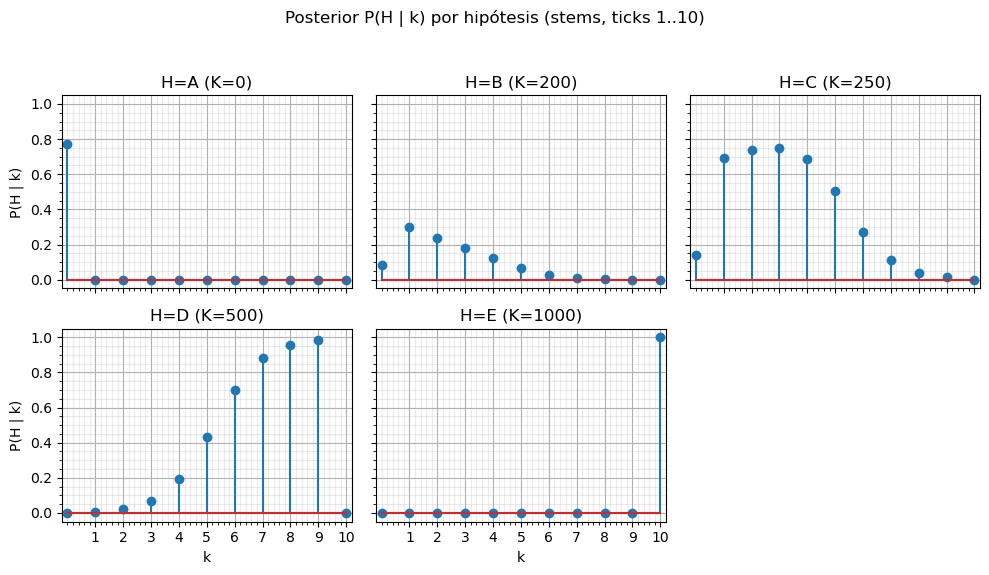

In [10]:
# Grafica P(H | k) usando verosimilitud hipergeométrica (sin reemplazo).
# Produce: (1) gráfico combinado y (2) subplots tipo "stem" por hipótesis,
# con ticks en enteros 1..10 y subgrilla.

import math
import matplotlib.pyplot as plt

# ---------------------------
# Parámetros (podés editarlos)
# ---------------------------
N = 1000                     # tamaño de la caja
n = 10                       # extracciones sin reemplazo
k_vals = list(range(0, n+1))

# Éxitos (cobres) por tipo de caja
K = {"A": 0, "B": 200, "C": 250, "D": 500, "E": 1000}

# Priors
priors = {"A": 0.15, "B": 0.15, "C": 0.50, "D": 0.10, "E": 0.10}

# ---------------------------
# Utilidades numéricas
# ---------------------------
def logchoose(N_, k_):
    if k_ < 0 or k_ > N_:
        return float("-inf")
    return math.lgamma(N_ + 1) - math.lgamma(k_ + 1) - math.lgamma(N_ - k_ + 1)

def hypergeom_log_pmf(k_obs, N_, K_, n_):
    # log P(X=k) = logC(K, k) + logC(N-K, n-k) - logC(N, n)
    return logchoose(K_, k_obs) + logchoose(N_ - K_, n_ - k_obs) - logchoose(N_, n_)

def logsumexp(values):
    m = max(values)
    if m == float("-inf"):
        return m
    s = 0.0
    for v in values:
        s += math.exp(v - m)
    return m + math.log(s)

# ---------------------------
# Cálculo de P(H | k) para k=0..n
# ---------------------------
post = {h: [] for h in K.keys()}

for k in k_vals:
    log_lik = {h: hypergeom_log_pmf(k, N, K[h], n) for h in K.keys()}
    log_w   = {h: math.log(priors[h]) + log_lik[h] for h in K.keys()}
    lse = logsumexp(list(log_w.values()))
    for h in K.keys():
        post[h].append(math.exp(log_w[h] - lse))

# ---------------------------
# (1) Gráfico combinado
# ---------------------------
plt.figure(figsize=(8,5))
ax = plt.gca()
for h in ["A","B","C","D","E"]:
    ax.plot(k_vals, post[h], marker="o", label=f"H={h} (K={K[h]})")

ax.set_xlabel("k = # de cobres observados en n=10 extracciones sin reemplazo")
ax.set_ylabel("Posterior  P(H | k)")
ax.set_title("Posterior por hipótesis vs. k (hipergeométrica, N=1000, n=10)")

# ticks exactamente en 1..10 + subgrilla
ax.set_xlim(-0.2, n + 0.2)
ax.set_xticks(list(range(1, n + 1)))
ax.minorticks_on()
ax.grid(True, which="major")
ax.grid(True, which="minor", alpha=0.25)

ax.legend()
plt.tight_layout()

# ---------------------------
# (2) Subplots por hipótesis (stems)
# ---------------------------
fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)
axes = axes.ravel()

for i, h in enumerate(["A", "B", "C", "D", "E"]):
    ax = axes[i]
    markerline, stemlines, baseline = ax.stem(k_vals, post[h], use_line_collection=True)
    ax.set_title(f"H={h} (K={K[h]})")
    ax.set_xlim(-0.2, n + 0.2)
    ax.set_xticks(list(range(1, n + 1)))
    ax.minorticks_on()
    ax.grid(True, which="major")
    ax.grid(True, which="minor", alpha=0.25)
    if i % 3 == 0:
        ax.set_ylabel("P(H | k)")
    if i >= 3:
        ax.set_xlabel("k")

# Quitar el subplot vacío
axes[-1].axis('off')

fig.suptitle("Posterior P(H | k) por hipótesis (stems, ticks 1..10)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### 1.4 Para cada hipótesis, ¿cuál es la probabilidad de que el cuarto tornillo extraído sea de cobre?

Depende cómo se plantee la respuesta, podemos desarrollarlo de dos formas distintas:

#### Sin saber de qué tipo fueron los primeros 3 tornillos

De no saber de qué tipo de tornillos se sacaron en los 3 primeros eventos, por simetría de probabilidad, todas las posiciones son equivalentes y la probabilidad de sacar un tornillo de cobre después de 3 tornillos desconocidos es la misma que la de sacar como primer tornillo uno que sea de cobre.

Es decir, extraer sin reemplazo es lo mismo que barajar los  $N$ tornillos al azar y mirar el de la posición 4. Como el barajado es uniforme, todas las posiciones son equivalentes. La fracción de cobres en cualquier posición es $\frac{K_i}{N}$

Por ende, nos queda para cada caso particular:

* $H = A\text{:} \qquad \frac{0}{1000} = 0$

* $H = B\text{:} \qquad \frac{200}{1000} = 0.2$

* $H = C\text{:} \qquad \frac{250}{1000} = 0.25$

* $H = D\text{:} \qquad \frac{500}{1000} = 0.5$

* $H = E\text{:} \qquad \frac{1000}{1000} = 1$



#### Conociendo los tipos de tornillos que se sacaron previamente

Si en las primeras $j$ extracciones salieron $r$ cantidad de tornillos de cobre, entonces para la extracción $j+1$ se tendrá una probabilidad de que sea de cobre de:

$$
P(Cu | H_i,r,j) = \frac{K_i-r}{N-j}
$$

Para cada uno de nuestros casos:

- $P(Cu | B, r, 3) = \frac{200-r}{1000-j} = \frac{200-r}{997}$

- $P(Cu | C, r, 3) = \frac{250-r}{1000-j} = \frac{250-r}{997}$

- $P(Cu | D, r, 3) = \frac{500-r}{1000-j} = \frac{500-r}{997}$

Para el caso de $H=A$ no existe probabilidad alguna ya que no existen tornillos de cobre en la caja A.

Por otro lado, para el caso $H=E$ la ecuación solo cumple si $r=j$, ya que la caja E contiene exclusivamente tornillos de cobre (por lo que sería irracional que salga otro tipo de tornillo, a menos que se plantee otro tipo de problema en la producción).

## 2. ¿Qué diferencia principal existe entre un algoritmo supervisado y un algoritmo no supervisado?

La principal diferencia entre un algoritmo supervisado y uno no supervisado, radica en la naturaleza de los datos de entrada y el objetivo del aprendizaje:

+ __Algoritmo supervisado__:
    - __Datos de Entrada__: Cuentan con etiquetas (labels). Esto significa que el conjunto de datos de entrenamiento incluye tanto las entradas como las salidas correctas deseadas.
    - __Objetivo__: El problema fundamental es aprender una función que asocie las entradas con las salidas correctas. En esencia, el algoritmo es "supervisado" por las respuestas correctas.
    - __Ejemplo__: Aprendizaje Bayesiano, Knn (K nearest neighbours).

+ __Algoritmo no supervisado__: 
    - __Datos de Entrada__: No tienen etiquetas. El agente solo recibe los datos de entrada sin ninguna indicación de la salida correcta.
    - __Objetivo__: El problema fundamental es encontrar la estructura subyacente o patrones dentro de un conjunto de datos. El algoritmo debe inferir por sí mismo las agrupaciones o dimensiones.
    - __Ejemplo__: K-means.
        

# Ejercicios de implementación

## 3. Genere un conjunto de 23 puntos que contengan coordenadas *xy* aleatorias con valores contenidos en el intervalo [0, 5] y grafique los puntos obtenidos en un gráfico.

### 3.1 Implemente un algoritmo K-means que clasifique 20 de los puntos en 2 grupos y grafique el resultado asignando un color a cada uno.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# --- 3. Generar un conjunto de 23 puntos ---
N_PUNTOS_TOTAL = 23
LIMITE_INFERIOR = 0
LIMITE_SUPERIOR = 5
N_PUNTOS_KMEANS = 20
N_CLUSTERS = 2

# Generar 23 puntos con coordenadas (x, y) aleatorias en [0, 5]
puntos_totales = np.random.uniform(low=LIMITE_INFERIOR, high=LIMITE_SUPERIOR, size=(N_PUNTOS_TOTAL, 2))

# Preparar datos para K-means
puntos_kmeans = puntos_totales[:N_PUNTOS_KMEANS]
puntos_excluidos = puntos_totales[N_PUNTOS_KMEANS:]

# --- Gráfico 1: Los 23 puntos iniciales ---
# Crea la PRIMERA figura
plt.figure(figsize=(8, 6))
plt.scatter(puntos_totales[:, 0], puntos_totales[:, 1], color='blue', label='23 Puntos Aleatorios')
plt.title('3. Puntos Aleatorios Generados en [0, 5]')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.xlim(LIMITE_INFERIOR - 0.5, LIMITE_SUPERIOR + 0.5)
plt.ylim(LIMITE_INFERIOR - 0.5, LIMITE_SUPERIOR + 0.5)
plt.grid(True)
plt.legend()


# --- 3.1 Implementar un algoritmo K-means ---
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init='auto')
kmeans.fit(puntos_kmeans)
etiquetas = kmeans.labels_
centroides = kmeans.cluster_centers_

# --- Gráfico 2: Resultado de K-means ---
# Crea la SEGUNDA figura
plt.figure(figsize=(8, 6))

# Graficar los 20 puntos clasificados
plt.scatter(puntos_kmeans[:, 0], puntos_kmeans[:, 1], c=etiquetas, cmap='cool', s=100, label=f'{N_PUNTOS_KMEANS} Puntos Clasificados (K-means)')

# Graficar los centroides
plt.scatter(centroides[:, 0], centroides[:, 1], marker='X', s=200, color='black', label='Centroides', linewidths=2)

# Graficar los puntos excluidos
plt.scatter(puntos_excluidos[:, 0], puntos_excluidos[:, 1], marker='o', s=50, color='gray', alpha=0.5, label='3 Puntos Excluidos')

plt.title(f'3.1. Clasificación K-means de {N_PUNTOS_KMEANS} Puntos en {N_CLUSTERS} Grupos')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.xlim(LIMITE_INFERIOR - 0.5, LIMITE_SUPERIOR + 0.5)
plt.ylim(LIMITE_INFERIOR - 0.5, LIMITE_SUPERIOR + 0.5)
plt.grid(True)
plt.legend()

# --- Llamada UNICA a plt.show() al final ---
# Esta única llamada mostrará AMBAS figuras creadas anteriormente.
plt.show()

### 3.2 Tome los tres puntos restantes y clasifíquelos en los grupos obtenidos anteriormente usando el algoritmo Knn. Utilice distintos valores de K y anote lo que observa con esta elección.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# --- Configuración y Generación de Datos ---
N_PUNTOS_TOTAL = 23
LIMITE_INFERIOR = 0
LIMITE_SUPERIOR = 5
N_PUNTOS_KMEANS = 20
N_CLUSTERS = 2
valores_k = [1, 3, 5] # Valores de K a probar

# Generar 23 puntos aleatorios en [0, 5]
puntos_totales = np.random.uniform(low=LIMITE_INFERIOR, high=LIMITE_SUPERIOR, size=(N_PUNTOS_TOTAL, 2))

# Preparar datos
puntos_entrenamiento = puntos_totales[:N_PUNTOS_KMEANS] # 20 puntos para K-means/K-NN entrenamiento
puntos_prueba_knn = puntos_totales[N_PUNTOS_KMEANS:]    # 3 puntos para K-NN prueba

# --- 3. Generación y Gráfico de 23 Puntos (Figura 1) ---
plt.figure(figsize=(8, 6))
plt.scatter(puntos_totales[:, 0], puntos_totales[:, 1], color='blue', label='23 Puntos Aleatorios')
plt.title('3. Puntos Aleatorios Generados en [0, 5]')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.xlim(LIMITE_INFERIOR - 0.5, LIMITE_SUPERIOR + 0.5)
plt.ylim(LIMITE_INFERIOR - 0.5, LIMITE_SUPERIOR + 0.5)
plt.grid(True)
plt.legend()


# ----------------------------------------------------------------------
# --- 3.1. Implementación de K-means (Entrenamiento) ---
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init='auto')
kmeans.fit(puntos_entrenamiento)
etiquetas_entrenamiento = kmeans.labels_ # Etiquetas (clase) de los 20 puntos
centroides = kmeans.cluster_centers_
cmap_colores = np.array(['green', 'orange']) # Color para Cluster 0 y Cluster 1

# ----------------------------------------------------------------------
# --- 3.2. Clasificación de los 3 puntos restantes con K-NN (Figura 2 con Subplots) ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
fig.suptitle('3.2. Clasificación K-NN de 3 Puntos Restantes con Distintos Valores de K', fontsize=16)

observaciones = []
marcadores_prueba = ['D', 's', '^'] # Diamante, Cuadrado, Triángulo para los 3 puntos

for i, k in enumerate(valores_k):
    # Seleccionar el subplot actual
    ax = axes[i]
    
    # 1. Entrenar K-NN para el valor de K actual
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(puntos_entrenamiento, etiquetas_entrenamiento)
    
    # 2. Predecir las etiquetas para los 3 puntos restantes
    etiquetas_predichas = knn.predict(puntos_prueba_knn)
    
    # 3. Almacenar observación
    observacion_str = f"K={k}: Etiquetas predichas: {etiquetas_predichas}"
    observaciones.append(observacion_str)
    
    # 4. Graficar los 20 puntos de entrenamiento (Fondo)
    ax.scatter(puntos_entrenamiento[:, 0], puntos_entrenamiento[:, 1], 
            c=cmap_colores[etiquetas_entrenamiento], s=80, 
            label='20 Puntos Clasificados (Entrenamiento)', alpha=0.6)
    
    # 5. Graficar Centroides
    ax.scatter(centroides[:, 0], centroides[:, 1], marker='X', s=150, color='black', label='Centroides K-means')
    
    # 6. Graficar los 3 Puntos de Prueba con el color predicho
    color_predicho = cmap_colores[etiquetas_predichas]
    for j in range(len(puntos_prueba_knn)):
        ax.scatter(puntos_prueba_knn[j, 0], puntos_prueba_knn[j, 1], 
                    marker=marcadores_prueba[j], s=180, 
                    color=color_predicho[j], edgecolors='red', linewidths=2,
                    label=f'Punto {j+1} Predicho ({cmap_colores[etiquetas_predichas[j]]})')
    
    # Configurar el subplot
    ax.set_title(f'Resultado con K = {k}')
    ax.set_xlabel('Coordenada X')
    ax.set_ylabel('Coordenada Y' if i == 0 else '')
    ax.set_xlim(LIMITE_INFERIOR - 0.5, LIMITE_SUPERIOR + 0.5)
    ax.set_ylim(LIMITE_INFERIOR - 0.5, LIMITE_SUPERIOR + 0.5)
    ax.grid(True)
    ax.legend(loc='upper left', fontsize=8)


# --- Observaciones Anotadas (Sección de texto) ---
print("\n" + "=" * 50)
print("3.2. Clasificación K-NN: Resultados y Observaciones")
print("=" * 50)
print("El conjunto de entrenamiento son los 20 puntos previamente clasificados por K-means (Verde/Naranja).")
print("Los 3 puntos de prueba son clasificados según el voto de sus K vecinos más cercanos.")
print("-" * 50)
for obs in observaciones:
    print(obs)
print("-" * 50)

# Mostrar ambas figuras simultáneamente
plt.show()

## 4. La imagen mostrada abajo muestra una red de salas y cómo se comunican entre ellas. Implemente un algoritmo Q-Learning con un factor despreciativo $γ = 0.9$. La matriz de recompensas debe asignar un valor de 0 a cada camino accesible y un valor de 100 a caminos que lleven a la sala del tesoro.

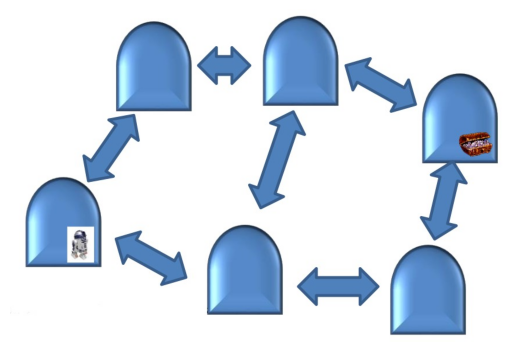

In [1]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL directa de Google Drive
url = "https://drive.google.com/uc?export=view&id=1dkDruEIPa7f-BAmjI47TZl3bxaqYf6a9"

# Descargar la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar ejes
plt.show()

### 4.1 Dibuje un diagrama con la asignación de recompensas correspondiente a cada estado.

### 4.2 Diseñe y muestre la matriz de recompensas.

### 4.3 Obtenga la matriz Q óptima, normalícela respecto al valor máximo encontrado y grafique la política obtenida en el diagrama mostrado inicialmente.

# Anexo

## Ejercicio 1

Para calcular las probabilidades de que salga cada tipo de recubrimiento electrolítico, aplicamos ley de probabilidad total:

$$
P(E) = \sum P(E|H_{i}) P(H_{i})
$$
Definimos entonces:
	$N\text{: Recubrimiento de Niquel}$
	$Cu\text{: Recubrimiento de cobre}$
	$Zn\text{: Recubrimiento de Cincado}$

Luego, tenemos la distribución de "tipos de cajas". Hay 5 tipos de cajas, cada una con un tipo único de distribución de recubrimientos electrolíticos.

Tenemos para cada tipo de tornillo:
$$
\begin{align*}
P(N)  & = \sum P(N|H) P(H)  \\
 \\
 & = 1 \cdot \frac{15}{100} + 0.7 \cdot \frac{15}{100} + 0.5 \cdot \frac{50}{100} + 0.2 \cdot \frac{10}{100} + 0 \cdot \frac{10}{100} \\
 \\
 & =  0.525 = 52.5\%
\end{align*}
$$

$$
\begin{align*}
P(Cu)  & = \sum P(Cu|H) P(H)  \\
 \\
 & = 0 \cdot \frac{15}{100} + 0.2 \cdot \frac{15}{100} + 0.25 \cdot \frac{50}{100} + 0.5 \cdot \frac{10}{100} + 1 \cdot \frac{10}{100} \\
 \\
 & =  0.305 = 30.5\%
\end{align*}
$$

$$
\begin{align*}
P(Zn)  & = \sum P(Zn|H) P(H)  \\
 \\
 & = 0 \cdot \frac{15}{100} + 0.1 \cdot \frac{15}{100} + 0.25 \cdot \frac{50}{100} + 0.3 \cdot \frac{10}{100} + 0 \cdot \frac{10}{100} \\
 \\
 & =  0.17 = 17\%
\end{align*}
$$

Podríamos hacer una tabla:


| Tipo             | Caja A | Caja B | Caja C | Caja D | Caja E | Total |
| ---------------- | ------ | ------ | ------ | ------ | ------ | ----- |
| Niquel           | 100%   | 70%    | 50%    | 20%    | 0%     | 52.5% |
| Cobre            | 0%     | 20%    | 25%    | 50%    | 100%   | 30.5% |
| Cincado          | 0%     | 10%    | 25%    | 30%    | 0%     | 17%   |
| Frecuencia Cajas | 15     | 15     | 50     | 10     | 10     | 100   |



# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2017) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)